In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [26]:
#read data
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0, index_col=0)
#df = pd.read_csv("git_SeparationJackson/csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df = pd.read_csv("git_SeparationJackson/dfwithkhdelta.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv('csvData/articledataDBextCalcD.dat',  skip_blank_lines=True, skiprows=0)
#df = pd.read_csv('csvData/articledataDBmerged.csv',  skip_blank_lines=True, skiprows=0,  index_col=0)
#df = pd.read_csv('csvData/ModelDBentryTrim.csv', index_col=0, skip_blank_lines=True, skiprows=1)
df

,cid,cid_PM,cid_solvent,cid_acid,ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),intensity,...,R5,R6,R7,R8,Kh,Kh error,stoichiometry 1E:nHNO3,stoichiometry 1E:nHNO3 error,DeltaG (kJ/mol),DeltaG error (kJ/mol)
172,129822111.0,NaN,8182.0,944.0,D3DODGA,0.252,NaN,NaN,NaN,NaN,...,0.790668,85.5,7.0,45.580420,19.844890,inf,0.770625,inf,-74.157195,inf
173,129822111.0,NaN,8182.0,944.0,D3DODGA,0.201,NaN,NaN,NaN,NaN,...,0.790668,85.5,7.0,45.580420,19.844890,inf,0.770625,inf,-74.157195,inf
214,20752250.0,NaN,8182.0,944.0,TEHDGA,0.200,NaN,NaN,NaN,NaN,...,0.790668,58.0,7.0,22.979021,0.632990,0.416850,0.542506,0.444894,11.520739,16.590591
215,20752250.0,NaN,8182.0,944.0,TEHDGA,0.200,NaN,NaN,NaN,NaN,...,0.790668,58.0,7.0,22.979021,0.632990,0.416850,0.542506,0.444894,11.520739,16.590591
216,20752250.0,NaN,8182.0,944.0,TEHDGA,0.200,NaN,NaN,NaN,NaN,...,0.790668,58.0,7.0,22.979021,0.632990,0.416850,0.542506,0.444894,11.520739,16.590591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,87287946.0,NaN,6212.0,944.0,DMDODGA,0.250,NaN,NaN,NaN,NaN,...,0.790668,30.0,7.0,300.444444,7.625137,0.194795,1.133469,0.603841,-50.359008,0.633287
2247,87287946.0,NaN,6212.0,944.0,DMDODGA,0.300,NaN,NaN,NaN,NaN,...,0.790668,30.0,7.0,300.444444,7.625137,0.194795,1.133469,0.603841,-50.359008,0.633287
2249,87287946.0,NaN,6212.0,944.0,DMDODGA,0.250,NaN,NaN,NaN,NaN,...,0.790668,30.0,7.0,300.444444,7.625137,0.194795,1.133469,0.603841,-50.359008,0.633287
2281,87287946.0,NaN,6212.0,944.0,DMDODGA,0.310,NaN,NaN,NaN,NaN,...,0.790668,30.0,7.0,300.444444,7.625137,0.194795,1.133469,0.603841,-50.359008,0.633287


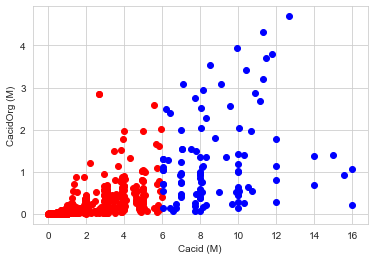

In [5]:
dfT = df[df['CacidOrg (M)'].isna() == False]
nodeField = 'Cacid (M)'
threshold= 6
node1 = dfT[dfT[nodeField] < threshold][[nodeField,'CacidOrg (M)']]
node2 = dfT[dfT[nodeField] > threshold][[nodeField,'CacidOrg (M)']]

plt.xlabel(nodeField)
plt.ylabel('CacidOrg (M)')
plt.scatter(node1[nodeField],node1['CacidOrg (M)'], color='red')
plt.scatter(node2[nodeField],node2['CacidOrg (M)'], color='blue')
plt.show()


#entropyN1 = np.sum( node1['CacidOrg (M)']*np.log(node1['CacidOrg (M)']))


### Now we should find the important collumns that we are going to use

In [27]:
#fields that are going to be the input
#there are pre-set to test, use inputFields, yfield to set the desired calculation
i1 = ['Cextractant (M)','Cacid (M)']
i2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
i3 = ['Cextractant (M)','Cacid (M)', 'XlogP', 'Polarity Index']
i4 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)']
i5 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)','Cion (M)']
i6 = ['Cextractant (M)','Cacid (M)', 'Cion (M)']
i7 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index']
i8 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener']
i9 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener', 'Heterogeneity Index']
i10 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i11 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i12 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)']
i13 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)','Cpm (M)']
i14 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index','Cpm (M)']
i15 = ['Cextractant (M)', 'intensity', 'Cacid (M)','Molecular Weight', 'XlogP',
       'Rotatable bond count', 'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index']

i16 = ['Cextractant (M)', 'Rg', 'has acid?']
i17 = ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)']
i18 = ['Cextractant (M)', 'Cacid (M)', 'Branching Index']
i19= ['Cextractant (M)', 'Rg', 'Temp (K)']
i20 = ['Cextractant (M)', 'Cacid (M)', 'Cion (M)', 'XlogP']
i21 = ['Cacid (M)', 'Cpm (M)', 'Polarity Index', 'Heterogeneity Index']
i22= ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Branching Index']
#, ('Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Polarity Index'), ('Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Heterogeneity Index')
i23 = ['Cextractant (M)', 'Rg', 'Temp (K)', 'Molecular Weight']
i24 = ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)', 'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index', 'Polarity Index', 'Heterogeneity Index']
i25 = ['Cextractant (M)','Cacid (M)','Cpm (M)','XlogP']
i26 = ['Cextractant (M)', 'Cacid (M)', 'H bond acceptor count', 'Polarity Index', 'Heterogeneity Index']

i27= ['Cextractant (M)', 'Cacid (M)', 'Cpm (M)','XlogP','H bond acceptor count', 'Polarity Index', 'Heterogeneity Index', 'Branching Index']

t1 = ['Cextractant (M)','Cacid (M)']
t2 = ['Cextractant (M)','Cacid (M)', 'XlogP']
t3 = ['Cextractant (M)','Cacid (M)', 'Polarity Index']
t4 = ['Cextractant (M)','Cacid (M)', 'Branching Index']
t5 = ['Cextractant (M)','Cacid (M)', 'Heterogeneity Index']
t6 = ['Cextractant (M)','Cacid (M)', 'Wiener']
t7 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener', 'Kh', 'DeltaG (kJ/mol)']

o1 = ['CacidOrg (M)']
o2 = ['CionOrg (M)']
o3 = ['D(acid)']
o4 = ['D(ion)']
o5 = ['Rg']
o6 = ['ExtractantMonomer (%)']
o7 = ['AverageAggregateSize (A)']

inputField = t7
outputFields = o1

In [28]:

#extra condition to separate the database
dfSize=df[ (df['has PM?'] == 0) & (df['Third phase'] == 0)]
#dfSize = df

#Cleaning the null and NaN fields
feature = dfSize[inputField+outputFields].copy()
feature = feature.dropna()
feature = feature.drop_duplicates()
feature = feature.reset_index(drop=True)  ## this line is important, otherwise the indexes will be wierd
feature

,Cextractant (M),Cacid (M),XlogP,Polarity Index,Branching Index,Heterogeneity Index,Wiener,Kh,DeltaG (kJ/mol),CacidOrg (M)
0,0.252,1.00,17.1,3.722409,144.0,8.416,13036.0,19.844890,-74.157195,0.025000
1,0.201,1.00,17.1,3.722409,144.0,8.416,13036.0,19.844890,-74.157195,0.019000
2,0.200,2.99,11.6,3.722409,360.0,8.774,6572.0,0.632990,11.520739,0.182679
3,0.200,1.99,11.6,3.722409,360.0,8.774,6572.0,0.632990,11.520739,0.096868
4,0.200,0.99,11.6,3.722409,360.0,8.774,6572.0,0.632990,11.520739,0.034843
...,...,...,...,...,...,...,...,...,...,...
126,0.200,2.00,6.0,3.722409,78.0,7.843,2704.0,7.625137,-50.359008,0.117000
127,0.250,2.00,6.0,3.722409,78.0,7.843,2704.0,7.625137,-50.359008,0.152000
128,0.300,2.00,6.0,3.722409,78.0,7.843,2704.0,7.625137,-50.359008,0.172000
129,0.250,2.00,6.0,3.722409,78.0,7.843,2704.0,7.625137,-50.359008,0.160000


## Decision tree classifier/prediction?

In [29]:
#define the category values
y = feature['CacidOrg (M)'].values
y

feature = feature.drop('CacidOrg (M)', axis=1)
feature_list = list(feature.columns)
#feature_list
X = np.array(feature)
#X[0:5,::]


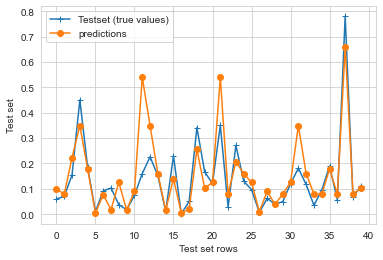

DecisionTrees's R2:  0.6269169945655296
Root mean square error: 0.08745457821054027
Mean Absolute Error: 0.01719457026081633 M


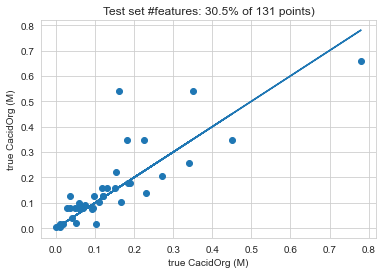

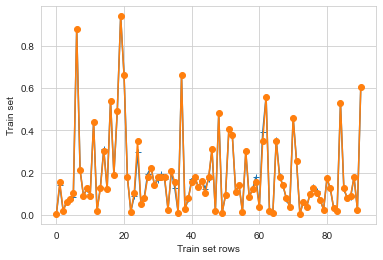

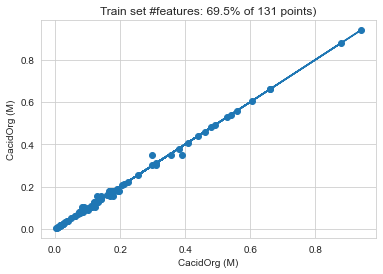

DecisionTrees's R2:  0.9975330755429267
Root mean square error: 0.009606538467318309
Mean Absolute Error: 1.525031627232358e-19 M


In [31]:
#split the data set

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)
#create the classifier
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn import metrics

myTree = DecisionTreeRegressor(max_depth=8) #use 2^max_depth = number of possible branches...
myTree # it shows the default parameters

#fit the train set...
myTree.fit(X_trainset,y_trainset)
#now that it is trained we can make some predictions
predTree = myTree.predict(X_testset)
predictionsTrain = myTree.predict(X_trainset)
#print (predTree[0:10])
#print (y_testset[0:10])

plt.xlabel("Test set rows")
plt.ylabel("Test set")
plt.plot(y_testset, marker='+', label='Testset (true values)')
plt.plot(predTree, marker = 'o', label='predictions')
plt.legend()
plt.show()

plt.xlabel("true CacidOrg (M)")
plt.ylabel("true CacidOrg (M)")
plt.scatter(y_testset, predTree)
plt.plot(y_testset, y_testset)
plt.title('Test set #features: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", metrics.r2_score(y_testset,predTree))
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_testset, predTree)))
print('Mean Absolute Error:', abs(np.mean(y_testset-predTree)), 'M')

plt.show()
#_______tranning information
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
#plt.legend()
plt.show()

plt.xlabel("CacidOrg (M)")
plt.ylabel("CacidOrg (M)")
plt.scatter(y_trainset, predictionsTrain)
plt.plot(y_trainset, y_trainset)
plt.title('Train set #features: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.show()

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", metrics.r2_score(y_trainset,predictionsTrain))
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain)))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', abs(np.mean(y_trainset-predictionsTrain)), 'M')

> I can get 0.88/0.94 for CacidOrg, based on i14 o1, for data with no PM...

In [272]:
#Look what are the experimental configuration of the points that deviate a lot.
dfDeviation = pd.DataFrame( X_testset[(y_testset-predTree)>0.05] , columns= feature_list)
dfDeviation.sort_values(by=['Cextractant (M)','Cacid (M)'])

,Cextractant (M),Cacid (M),XlogP,Polarity Index,Branching Index,Heterogeneity Index
5,0.20,5.0,17.1,3.722409,144.0,8.417
6,0.20,10.0,17.1,3.722409,144.0,8.417
4,0.20,10.3,5.9,2.307315,16.0,4.125
0,0.38,3.0,12.8,3.722409,120.0,8.416
7,0.50,2.0,7.4,1.268597,40.0,3.236
2,0.50,8.0,7.4,1.268597,40.0,3.236
3,1.10,7.0,2.9,6.211799,30.0,8.888
1,1.10,10.0,2.9,6.211799,30.0,8.888


In [271]:
#Look what are the experimental configuration of the points that deviate a lot.
#lista =  feature_list+list([y])+list(['ypred','error'])
#reconstructedPrediction = pd.DataFrame([X_test,y_test, ypred], columns=lista)
#reconstructedPrediction = pd.DataFrame(data=np.column_stack((X_testset, y_testset, predTree, y_testset-predTree)), columns=lista)
#reconstructedPrediction

TypeError: unhashable type: 'numpy.ndarray'

TypeError: unhashable type: 'numpy.ndarray'

In [25]:
text_representation = tree.export_text(myTree)
#print(text_representation)
##recover original names of variables...
tnew = text_representation  #.replace("feature_0","has Acid?")

#names = ['ExtractantName', 'SolventName', 'AcidName',
#       'has acid?', 'Cacid (M)', 'CacidOrg (M)', 'ExtractionFactor',
#       'has ions?', 'xlogp', 'molecular_weight', 'h_bond_donor_count']

print(feature_list)

for i,name in enumerate(feature_list):
    tnew = tnew.replace('feature_'+str(i), name)

print(tnew)
outputTree = open('tree.dat','w+')
outputTree.write(tnew)
outputTree.close()


['Cextractant (M)', 'Cacid (M)', 'XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener']
|--- Cacid (M) <= 2.70
|   |--- Cacid (M) <= 1.65
|   |   |--- Cacid (M) <= 0.65
|   |   |   |--- Cacid (M) <= 0.40
|   |   |   |   |--- Branching Index <= 126.00
|   |   |   |   |   |--- Cacid (M) <= 0.15
|   |   |   |   |   |   |--- Cextractant (M) <= 0.14
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Cextractant (M) >  0.14
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- Cacid (M) >  0.15
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- Branching Index >  126.00
|   |   |   |   |   |--- Cextractant (M) <= 0.70
|   |   |   |   |   |   |--- Wiener <= 6844.00
|   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |--- Wiener >  6844.00
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |--- Cextractant (M) >  0.70
|   |   |   |   |   |   |--- Cacid (M) <= 0.16
|   |   |   |   

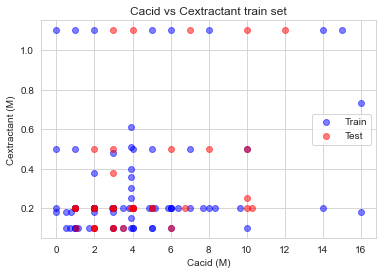

In [370]:
plt.title('Cacid vs Cextractant train set')
plt.xlabel('Cacid (M)')
plt.ylabel('Cextractant (M)')
plt.scatter(X_trainset[:,1] ,X_trainset[:,0] , color='blue' , alpha=0.5, label='Train')
plt.scatter(X_testset[:, 1], X_testset[:, 0], color ='red', alpha=0.5, label='Test')
plt.legend()

AttributeError: 'list' object has no attribute 'show'

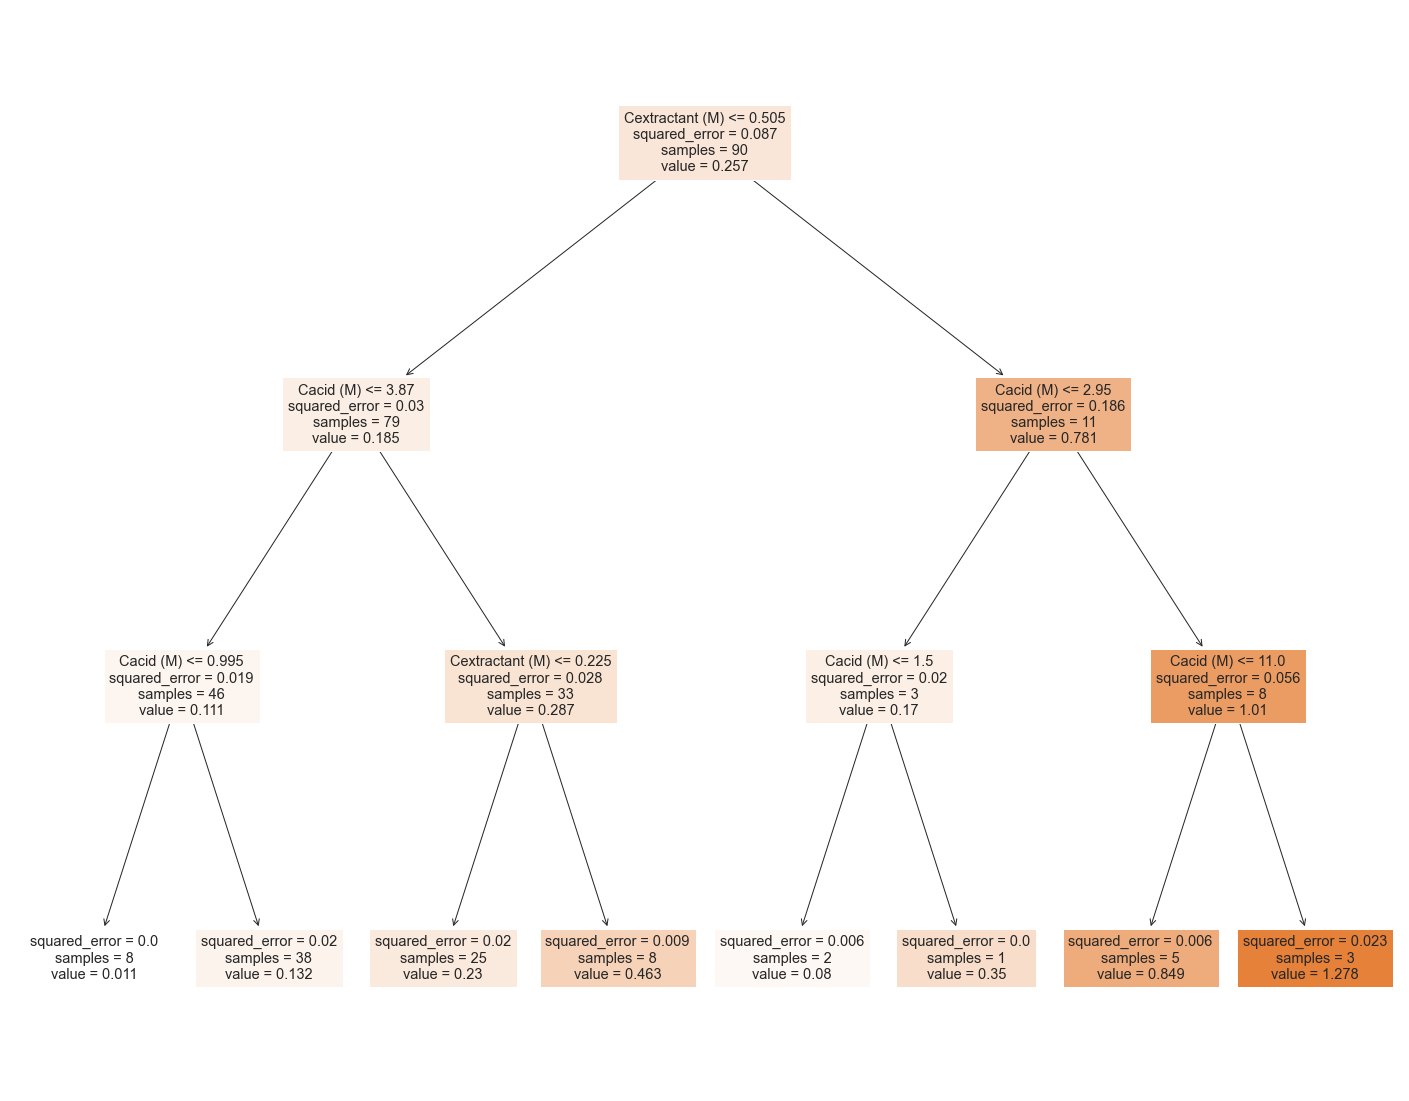

In [390]:
#%matplotlib inline

#fnames=['ExtractantName', 'SolventName', 'AcidName', 'AverageAggregateSize (A)',
#       'has acid?', 'Cacid (M)', 'has ions?', 'xlogp', 'molecular_weight',
#       'h_bond_donor_count']
fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(myTree,
                   feature_names= feature_list,
                   class_names= ['Third phase', 'Biphasic'] ,
                   filled=True)
#fig.savefig("0decistion_tree.png")
#plot.show()

___
# RANDOM FLOREST
___

In [371]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#1000 42 give awesome results
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_trainset, y_trainset)

RandomForestRegressor(n_estimators=1000, random_state=42)

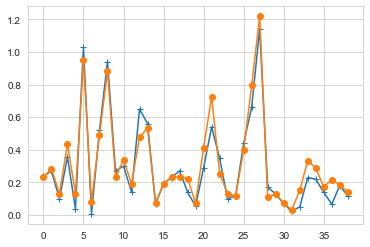

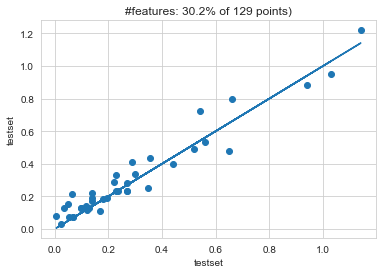

DecisionTrees's R2:  0.9262551637240043
Mean Absolute Error: 0.05631 M
Mean Square Error: 0.005541762724687797
Root mean square error: 0.07444301662807463


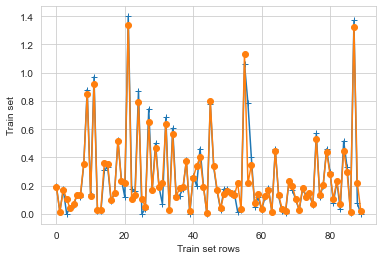

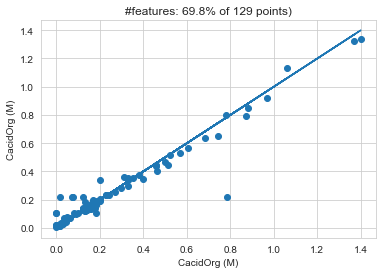

DecisionTrees's R2:  0.9331597829781457
Mean Absolute Error: 0.00039 M
Mean Square Error: 0.005833554314390906
Root mean square error: 0.0763777082295018


In [372]:
# Use the forest's predict method on the train and test data
predictionsTrain = rf.predict(X_trainset)
predictions = rf.predict(X_testset)
# Calculate the absolute errors
errors = abs(predictions - y_testset)

plt.plot(y_testset, marker='+')
plt.plot(predictions, marker = 'o')
plt.show()

plt.xlabel("testset")
plt.ylabel("testset")
plt.scatter(y_testset, predictions)
plt.plot(y_testset, y_testset)
plt.title('#features: '+f"{100*len(y_testset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.show()

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", metrics.r2_score(y_testset,predictions))
print('Mean Absolute Error:', round(np.mean(errors), 5), 'M')
print('Mean Square Error:', metrics.mean_squared_error(y_testset, predictions)) #< (yreal-ypred)^2 >
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_testset, predictions)))

#_____________________________

errors = abs(predictionsTrain - y_trainset)
plt.xlabel("Train set rows")
plt.ylabel("Train set")
plt.plot(y_trainset, marker='+')
plt.plot(predictionsTrain, marker = 'o')
plt.show()

plt.xlabel("CacidOrg (M)")
plt.ylabel("CacidOrg (M)")
plt.scatter(y_trainset, predictionsTrain)
plt.plot(y_trainset, y_trainset)
plt.title('#features: '+f"{100*len(y_trainset)/(len(y_testset)+len(y_trainset)):.1f}"+'% of '+str(len(y))+' points)')
plt.show()

#now use some metrics to see how good are the predictions
print("DecisionTrees's R2: ", metrics.r2_score(y_trainset,predictionsTrain))
print('Mean Absolute Error:', round(np.mean(y_trainset-predictionsTrain), 5), 'M')
print('Mean Square Error:', metrics.mean_squared_error(y_trainset, predictionsTrain)) #< (yreal-ypred)^2 >
print("Root mean square error:", np.sqrt(metrics.mean_squared_error(y_trainset, predictionsTrain)))


In [40]:
#Convert the celsius temperature to Kelvin temperatures
def fix_any_column(row):
    if float(row['Temperature (K)']) < 275.15:
        #print(row['Temperature (K)'])
        return (275.15+ float(row['Temperature (K)']))
    else:
        return float(row['Temperature (K)'])

#feature["Temperature (K)"] = feature.apply(fix_any_column, axis=1)

___
# This is the hierarchical classification
___

In [41]:
import scipy
leng = X.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(X[i], X[j])
D

array([[0.00000000e+00, 6.46390776e+05, 6.46390776e+05, ...,
        1.59371384e+07, 1.59371384e+07, 6.70005144e+07],
       [6.46390776e+05, 0.00000000e+00, 2.60341656e+00, ...,
        1.65835103e+07, 1.65835103e+07, 6.63541461e+07],
       [6.46390776e+05, 2.60341656e+00, 0.00000000e+00, ...,
        1.65835103e+07, 1.65835103e+07, 6.63541461e+07],
       ...,
       [1.59371384e+07, 1.65835103e+07, 1.65835103e+07, ...,
        0.00000000e+00, 6.23518266e+00, 8.29376510e+07],
       [1.59371384e+07, 1.65835103e+07, 1.65835103e+07, ...,
        6.23518266e+00, 0.00000000e+00, 8.29376510e+07],
       [6.70005144e+07, 6.63541461e+07, 6.63541461e+07, ...,
        8.29376510e+07, 8.29376510e+07, 0.00000000e+00]])

In [42]:
import pylab
import scipy.cluster.hierarchy as sch

In [43]:
Z = sch.linkage(D, 'complete')

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_72928/1275395818.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(D, 'complete')


In [44]:
#this block finds the cutting line of the dendograms, or, equivalently defines the number of clusters...

from scipy.cluster.hierarchy import fcluster
k = 2
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
      dtype=int32)

In [45]:
#we can finally plot the dendogram

#fnames=['ExtractantName', 'Cextractant (M)', 'SolventName', 'Has acid?',
#        'Cacid (M)', 'has PM?', 'PM name', 'Cpm (M)']

fig = pylab.figure(figsize=(18,50))
def llf(id):
    #print('id', id)
    #return feature['ExtractantName'][id]
    return featurena['ExtractantName'][id]
    
dendro = sch.dendrogram(Z, leaf_label_func=llf,
                              leaf_rotation=0, leaf_font_size =12, orientation = 'right')

#dendro = sch.dendrogram(sch.linkage(X, method='ward'))

KeyError: 'ExtractantName'

<Figure size 1296x3600 with 0 Axes>

In [ ]:
featurena["Classification"]= clusters

In [ ]:
clusters

In [ ]:
featurena.columns

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(X[clusters==0, 1], X[clusters==0, 5], s=50, marker='o', color='red')
ax.scatter(X[clusters==1, 1], X[clusters==1, 5], s=50, marker='o', color='blue')
ax.scatter(X[clusters==2, 1], X[clusters==2, 5], s=50, marker='o', color='green')
ax.scatter(X[clusters==3, 1], X[clusters==3, 5], s=50, marker='o', color='purple')
#ax.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

ax.set_xlabel("Extractant concentration (M)")
ax.set_ylabel("Acid Concentration (M)")

#every other tick entry
#ax.set_yticks(ax.get_yticks()[::50])
#plt.yticks(np.arange(1))
plt.show()

In [ ]:
featurena.loc[ featurena['Classification'] == 1]

In [ ]:
featurena.loc[ featurena['Classification'] == 2]

In [ ]:
featurena.loc[ featurena['Classification'] == 3]